<a href="https://colab.research.google.com/github/Nando-Lu/wine_quality_prediction/blob/main/wine_quality_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Descrição 🍷
Utilizando machine learning, criarei um sistema que a partir de dados químicos consegue definir se a qualidade do vinho é boa ou não.
O dataset que utilizarei se encontra nesse link: https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009

# Fluxo
1. Captura dos dados
2. Análise dos dados
3. Pré-processamento dos dados
4. Divisão dados de teste e treinamento
5. Alimentar/treinar o modelo(random forest model)
6. Testando o modelo


In [1]:
# Importando as bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 1. Captura de Dados

In [4]:
wine_data = pd.read_csv('./winequality-red.csv')

In [5]:
# Número de linhas e colunas do Dataset
wine_data.shape

(1599, 12)

In [9]:
# Verificando as 5 primeiras linhas, perceba que na última coluna tem-se
# o rótulo da qualidade do vinho
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [10]:
# Verificando se há valores ausentes
# Nesse caso, não há
wine_data.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


# 2. Análise dos dados

In [13]:
# Vendo as medidas estatísticas dos dados
# Com isso, é possível ver que a qualidade máxima é 8, e a mínima é 3
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


<Axes: xlabel='quality', ylabel='count'>

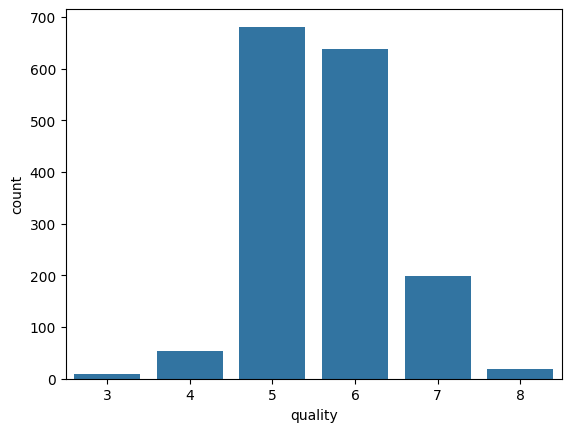

In [15]:
# Número de valores para cada qualidade
sns.countplot(x='quality', data=wine_data)

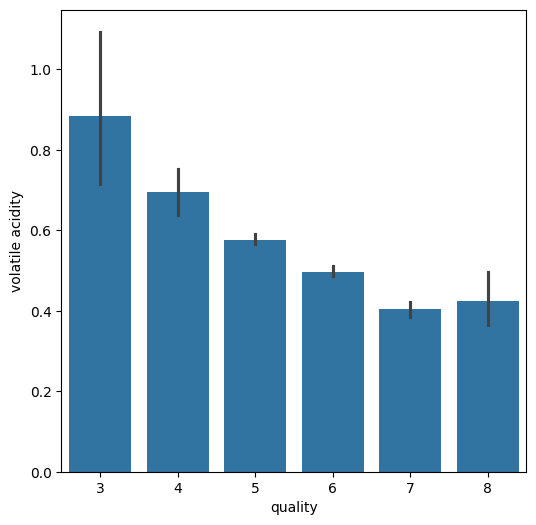

In [21]:
# volatile acidity vs quality
# Com o gráfico, é possivel ver que a acidez volátil e a qualidade são
# inversamente proporcionais
plt.figure(figsize=(6, 6))
sns.barplot(x='quality', y='volatile acidity', data=wine_data)
plt.show()

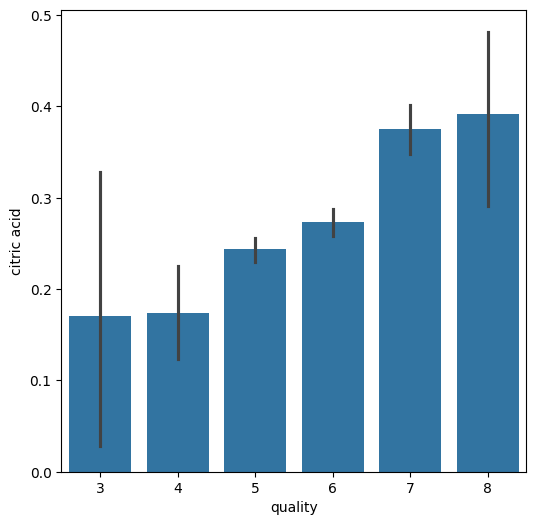

In [20]:
# citric acid vs quality
# Com o gráfico, é possivel ver que esses dois são diretamente proporcionais
plt.figure(figsize=(6, 6))
sns.barplot(data=wine_data, x='quality', y='citric acid')
plt.show()

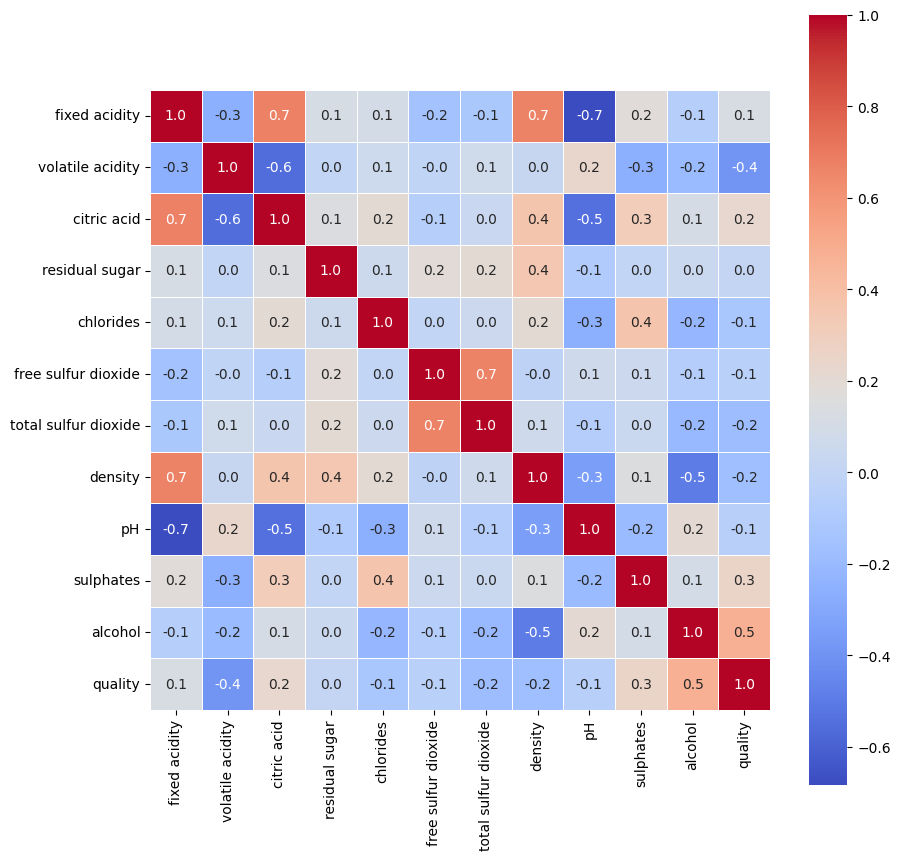

In [24]:
# Verificando a correlação geral:
# O mapa de calor confirma as proporcionalidades encontradas antes
correlation = wine_data.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, square=True, annot=True, cmap='coolwarm', fmt='.1f',
              linewidths=.5
            , cbar=True)
plt.show()

# 3. Pré-processamento dos dados

In [28]:
# Separando o rótulo dos dados
# a variável x ficará com os dados
# a variável y ficará com os rótulos
x = wine_data.drop(columns='quality', axis=1)

# Farei uma binarização dos rótulos antes de armazená-los
# na variável y, simplificando para o modelo
# Dividirei assim: qualidades acima ou igual a 7 recebem 1(boa)
# Qualidades abaixo de 7 receberão 0(ruim)
# Por isso é uma "binarização"
y = wine_data['quality'].apply(lambda linha: 1 if int(linha) >= 7 else 0)
print(x)
print(y)

      fixed acidity  volatile acidity  citric acid  ...    pH  sulphates  alcohol
0               7.4             0.700         0.00  ...  3.51       0.56      9.4
1               7.8             0.880         0.00  ...  3.20       0.68      9.8
2               7.8             0.760         0.04  ...  3.26       0.65      9.8
3              11.2             0.280         0.56  ...  3.16       0.58      9.8
4               7.4             0.700         0.00  ...  3.51       0.56      9.4
...             ...               ...          ...  ...   ...        ...      ...
1594            6.2             0.600         0.08  ...  3.45       0.58     10.5
1595            5.9             0.550         0.10  ...  3.52       0.76     11.2
1596            6.3             0.510         0.13  ...  3.42       0.75     11.0
1597            5.9             0.645         0.12  ...  3.57       0.71     10.2
1598            6.0             0.310         0.47  ...  3.39       0.66     11.0

[1599 rows x 11

# 4. Divisão em dados de teste e treinamento

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,
                                                    stratify=y,
                                                    random_state=2)

In [30]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(1279, 11) (320, 11) (1279,) (320,)


# 5. Alimentar/treinar o modelo Random Forest Classifier

In [31]:
model = RandomForestClassifier()

In [32]:
model.fit(x_train, y_train)

RandomForestClassifier()

# 6. Testando o modelo

In [33]:
# accuracy score para os dados de treinamento
train_predict = model.predict(x_train)
train_accuracy = accuracy_score(train_predict, y_train)
print(train_accuracy)

1.0


In [34]:
# accuracy score para os dados de teste
test_predict = model.predict(x_test)
test_accuracy = accuracy_score(test_predict, y_test)
print(test_accuracy)

0.940625
